In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
u = 1
chi = 1 / 2
dx = 0.1
dt = (dx ** 2) / (2 * (dx + 1))

s = u * dt / dx
r = chi * dt / (dx ** 2)

dt

0.004545454545454546

In [3]:
teta = 5
a = 0
b = 10

In [4]:
K = int((b - a) / dx) + 1
K

101

In [5]:
prev = np.zeros(K, dtype=np.float64)
for i in range(K // 2):
    prev[i] = 1.0
    
prev

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [6]:
def left_border(t):
    return math.sqrt(t)

def right_border(t):
    return math.exp(-(t ** 2))

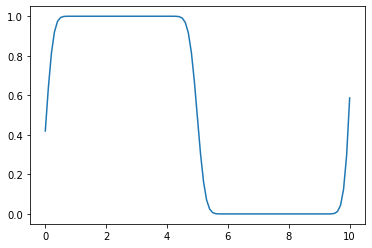

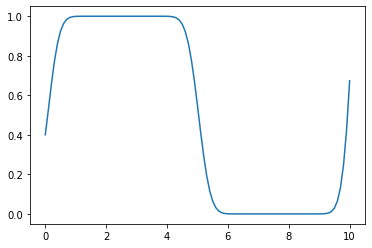

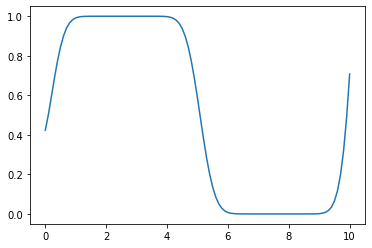

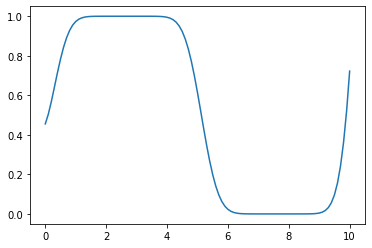

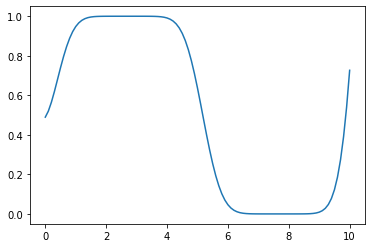

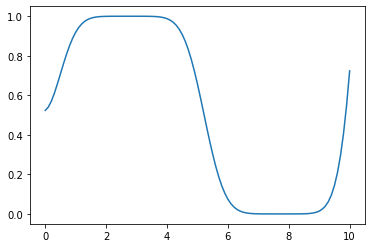

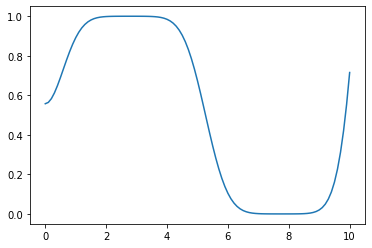

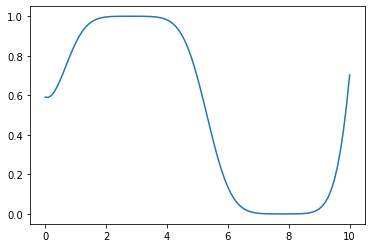

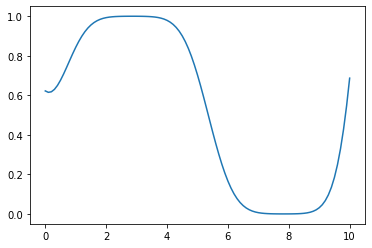

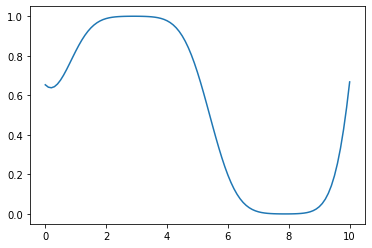

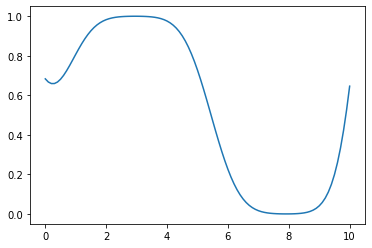

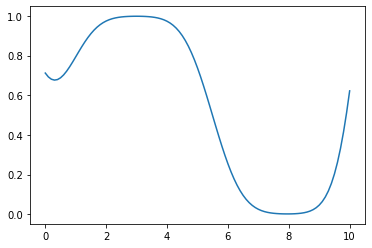

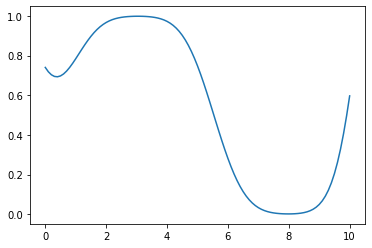

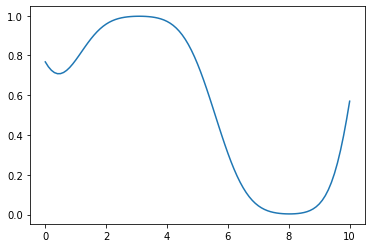

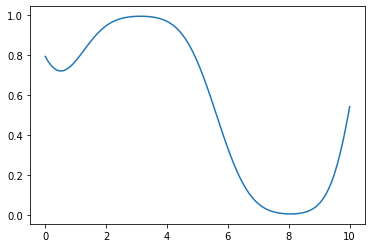

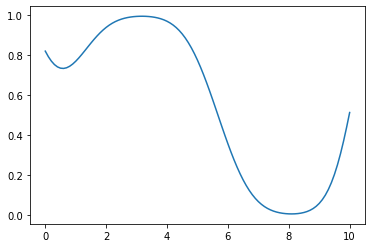

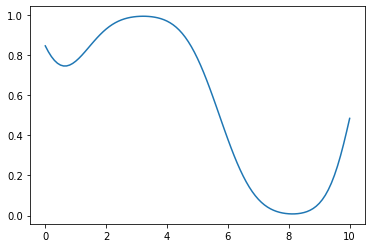

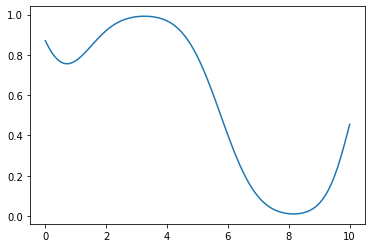

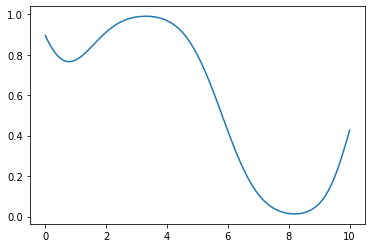

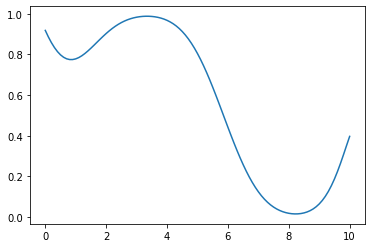

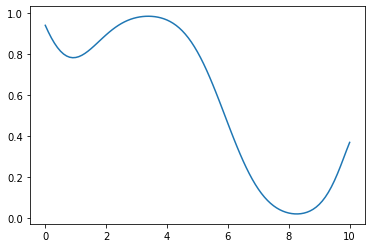

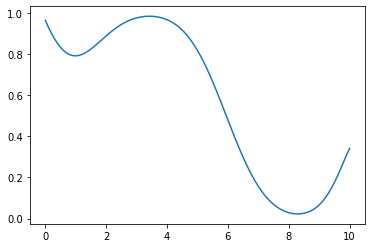

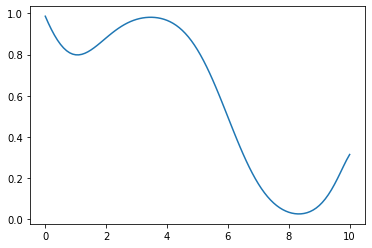

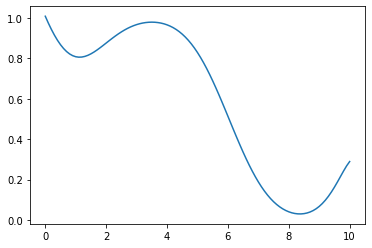

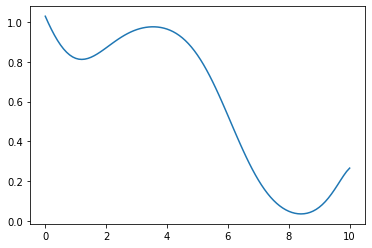

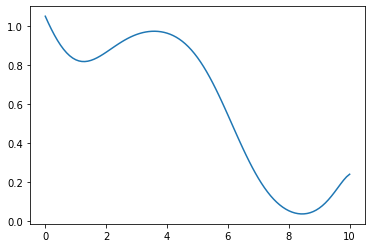

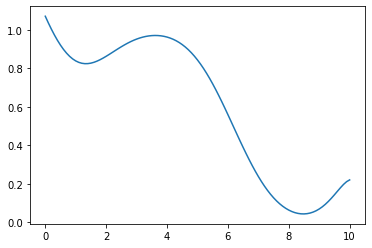

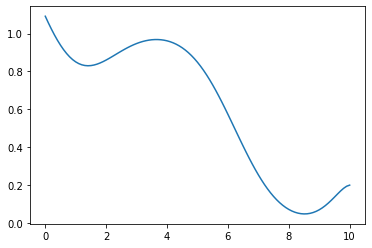

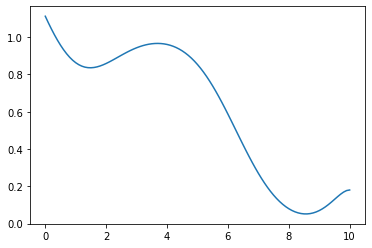

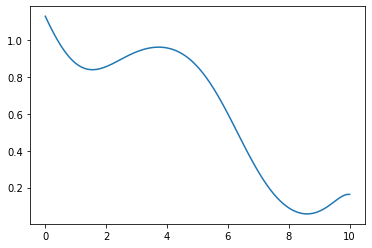

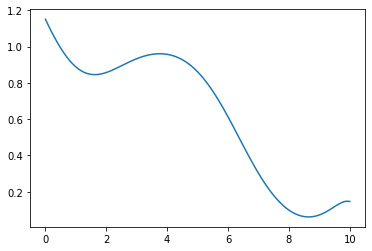

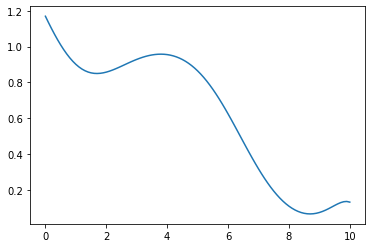

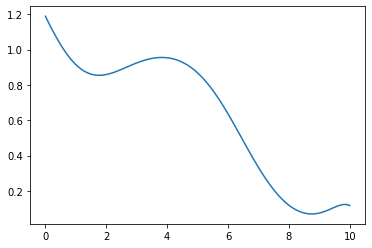

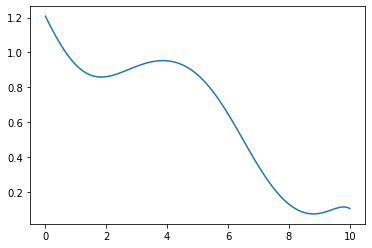

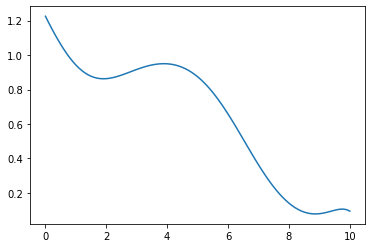

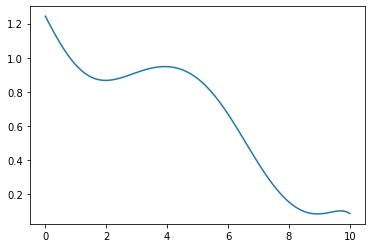

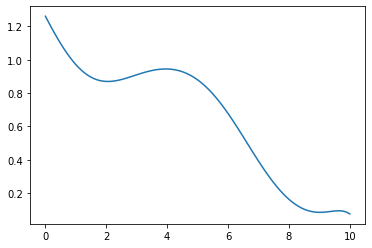

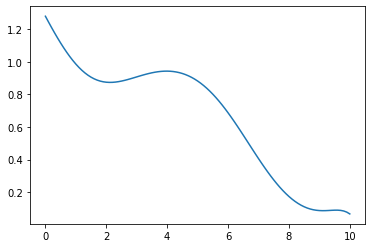

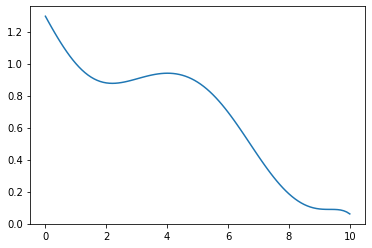

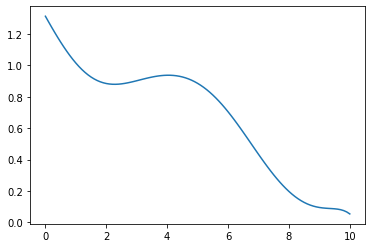

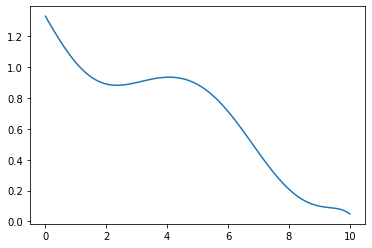

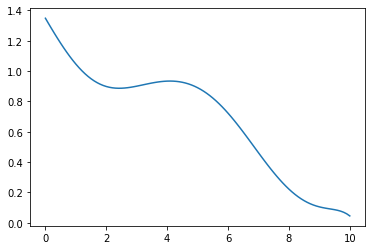

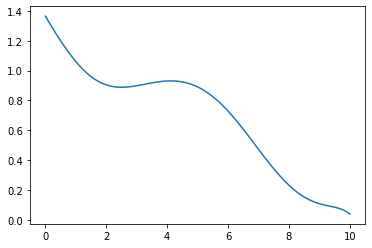

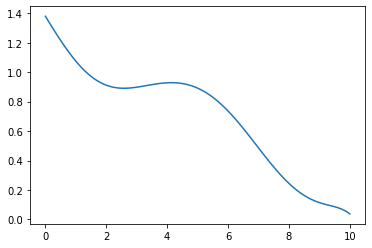

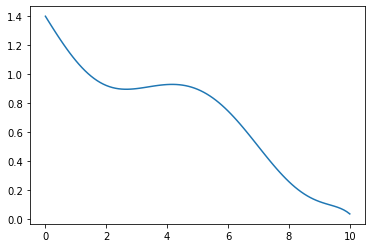

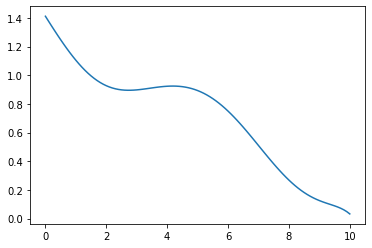

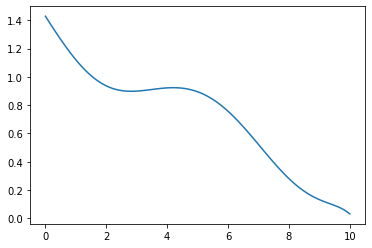

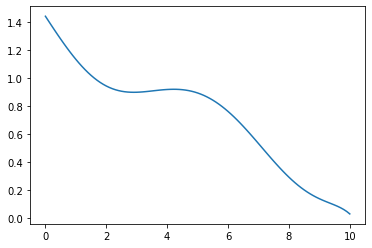

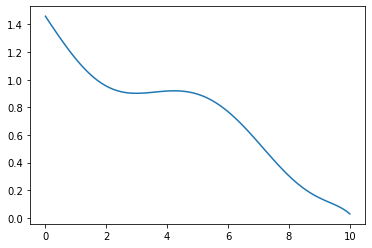

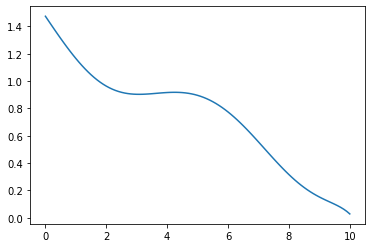

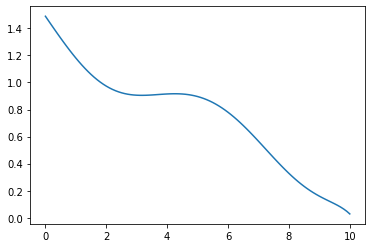

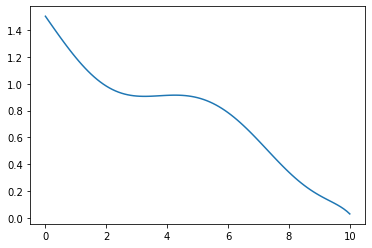

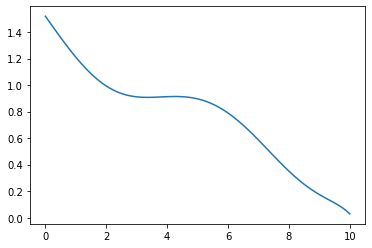

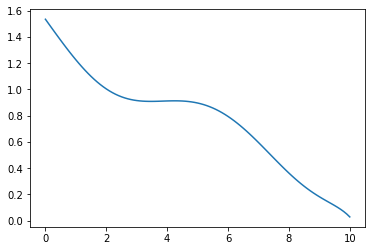

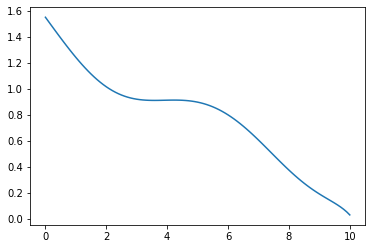

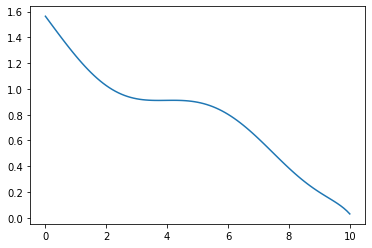

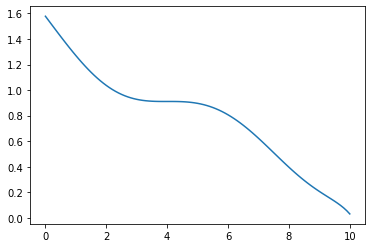

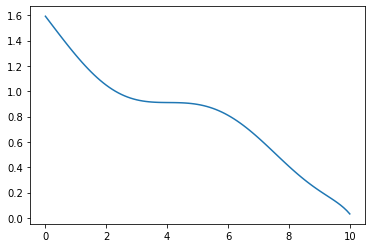

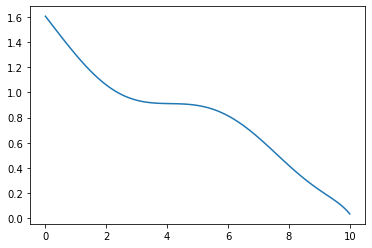

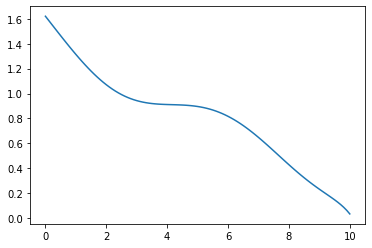

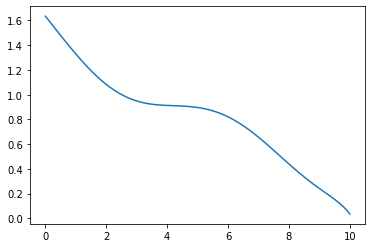

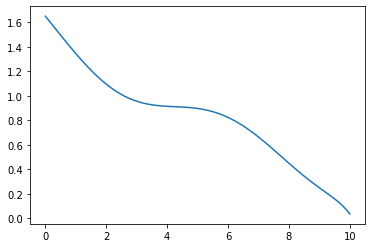

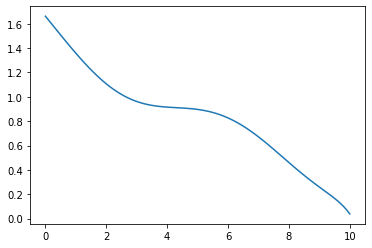

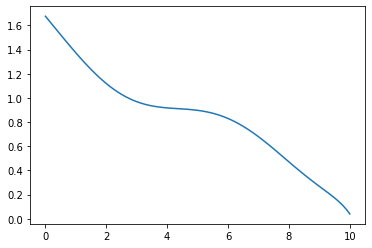

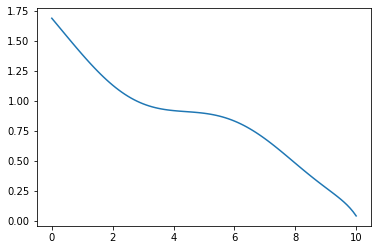

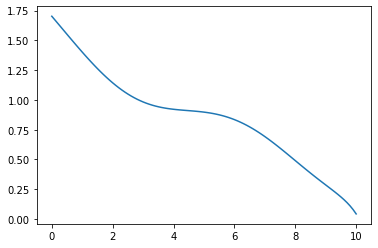

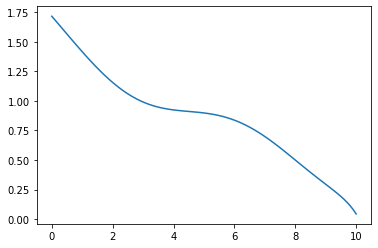

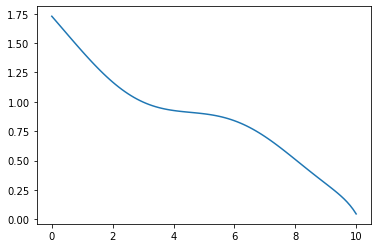

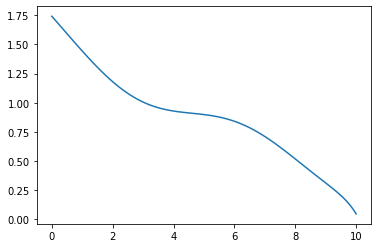

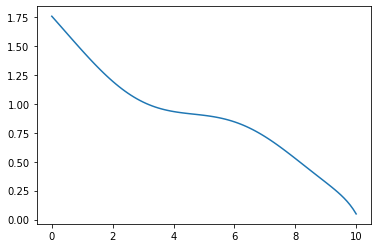

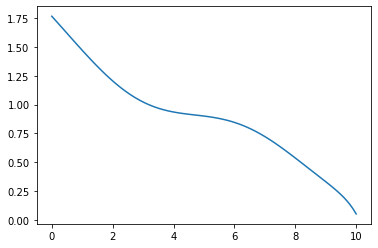

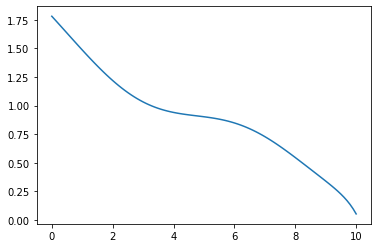

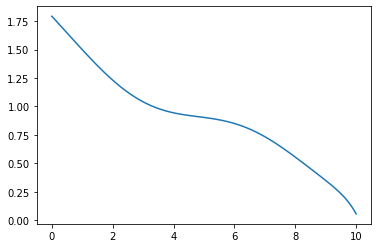

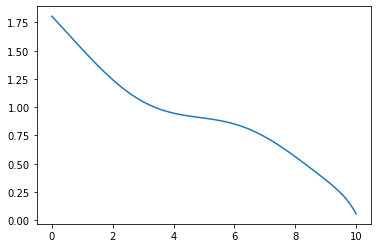

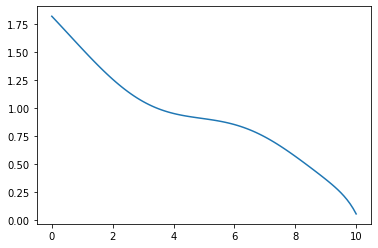

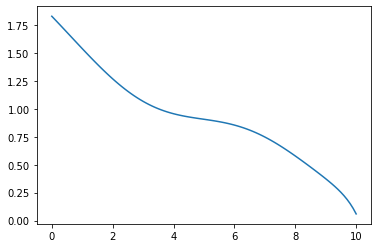

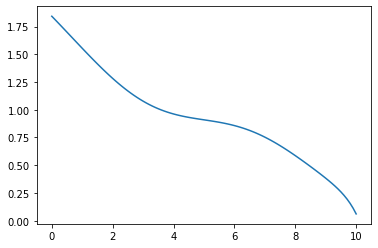

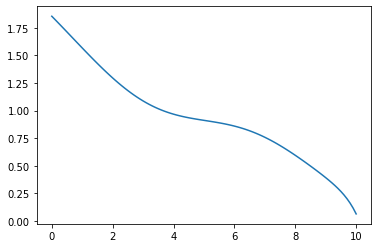

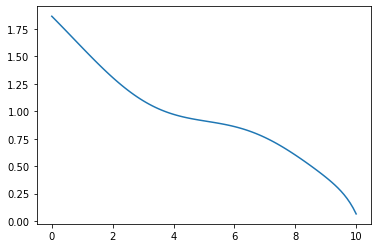

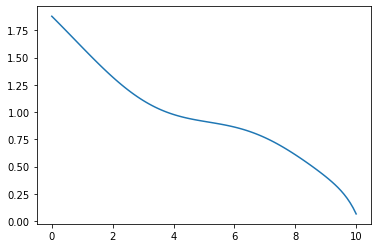

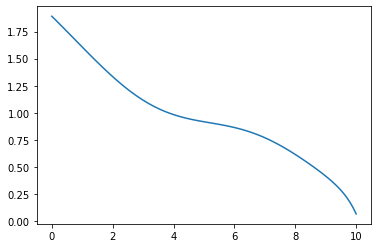

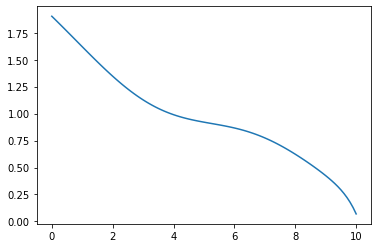

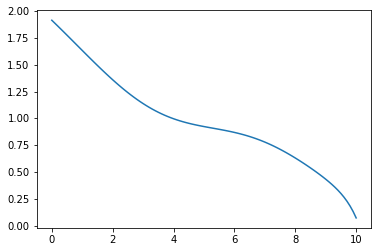

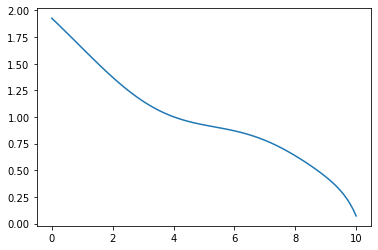

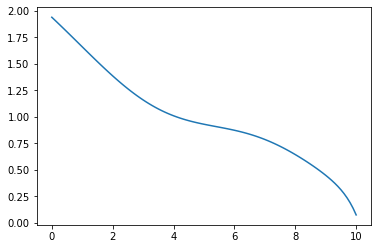

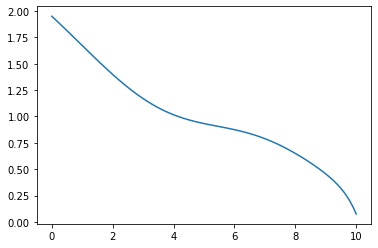

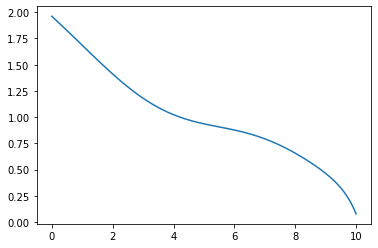

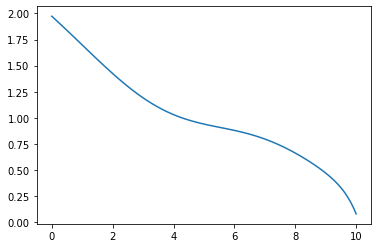

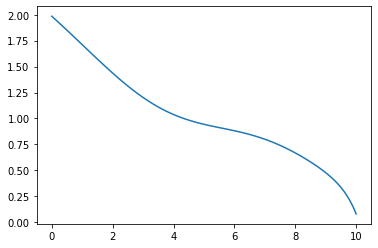

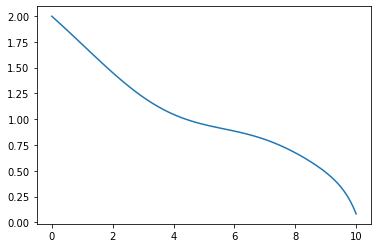

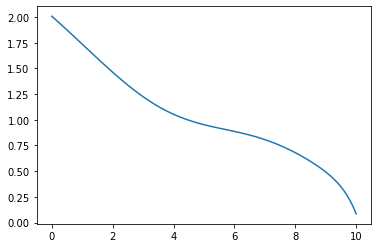

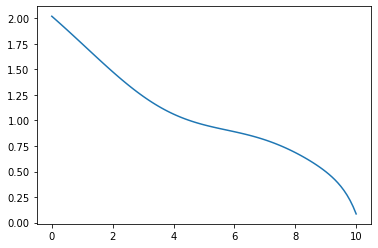

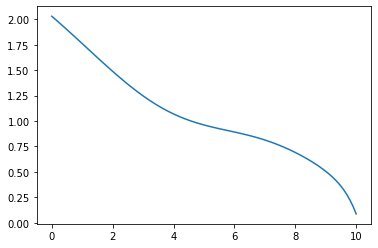

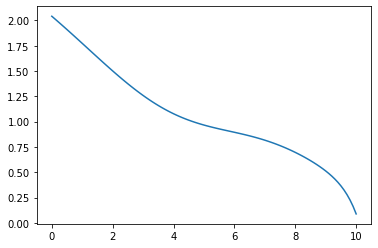

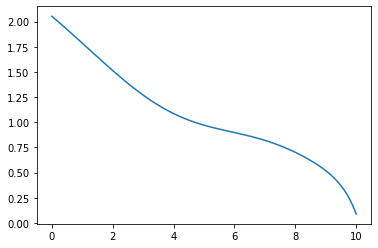

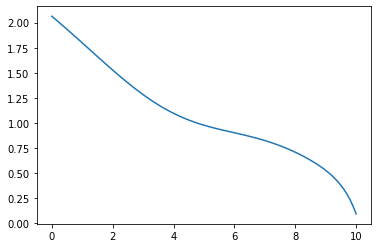

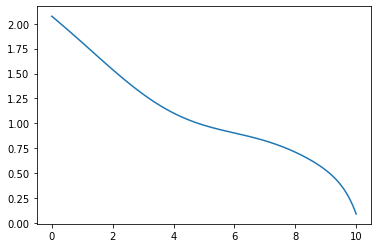

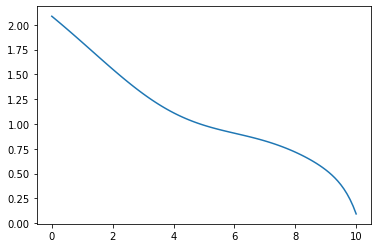

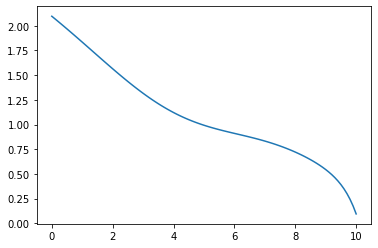

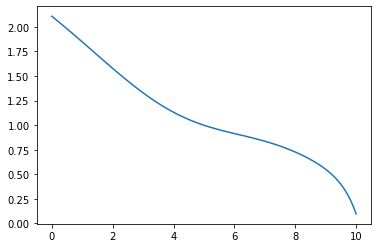

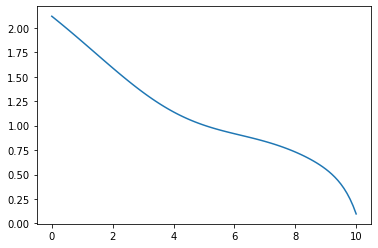

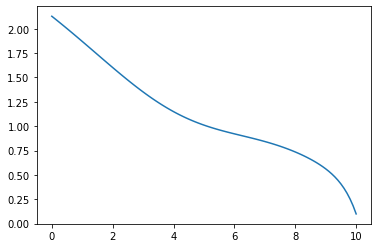

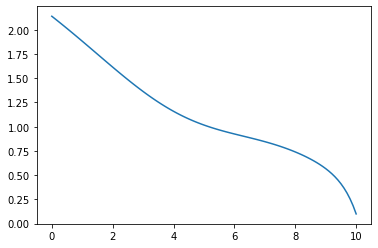

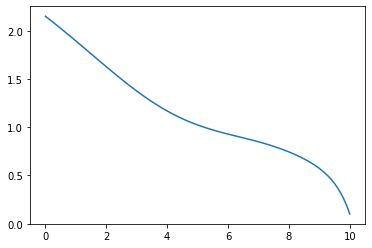

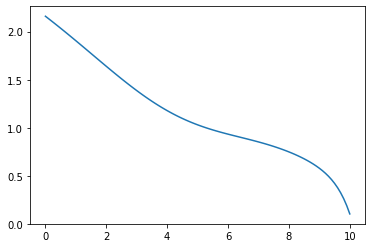

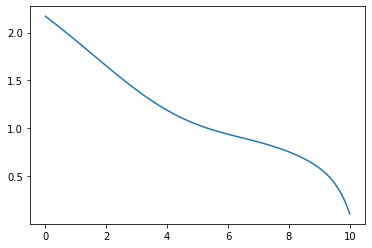

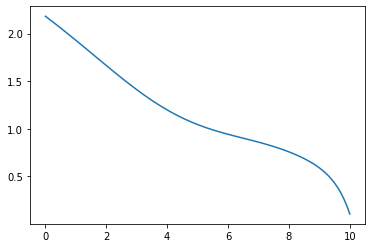

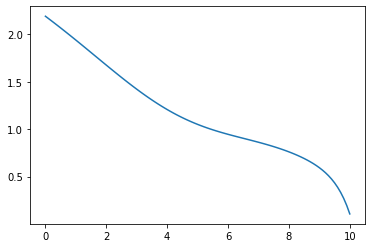

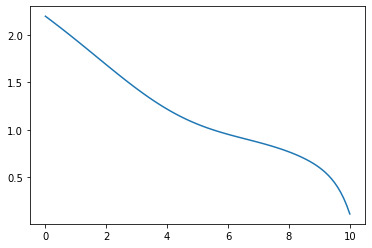

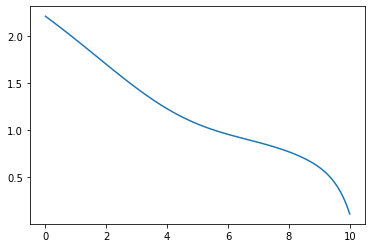

In [7]:
t = 0

iter_num = 0

while (t < teta):
    t += dt
    iter_num += 1
    cur = np.zeros(K, dtype=np.float64)
    
    for i in range(K):
        prev_t = prev[i - 1] if i > 0 else left_border(t)
        next_t = prev[i + 1] if i < K - 1 else right_border(t)
        cur_t = prev[i]
        
        cur[i] = cur_t - s * (cur_t - prev_t) + r * (prev_t + next_t - 2 * cur_t)
    
    xs = [
        a + i * dx
        for i in range(K)
    ]
    if (iter_num % 10 == 0):
        plt.figure()
        plt.plot(xs, prev)
        plt.show()
    
    prev = cur